# Global Happiness Predictions

## Introduction

Happiness depends on many things such as country’s economy, social support, and health. In this project, we look at data from different countries to see what really drives happiness. Using data analysis, machine learning, and clear visualizations, we try to understand patterns and predict how happiness might change in the future.

## Data Preprocessing

In [2]:
# Load necessary libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# Load the dataset
df = pd.read_csv('./dataset/dataset.csv')

# Display the first few rows of the dataset
display(df.head())

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023


In [4]:
# Get a summary of the dataset
df.info()

# Display basic statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [5]:
# Drop rows with nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


### 1.1 Correlation Analysis 

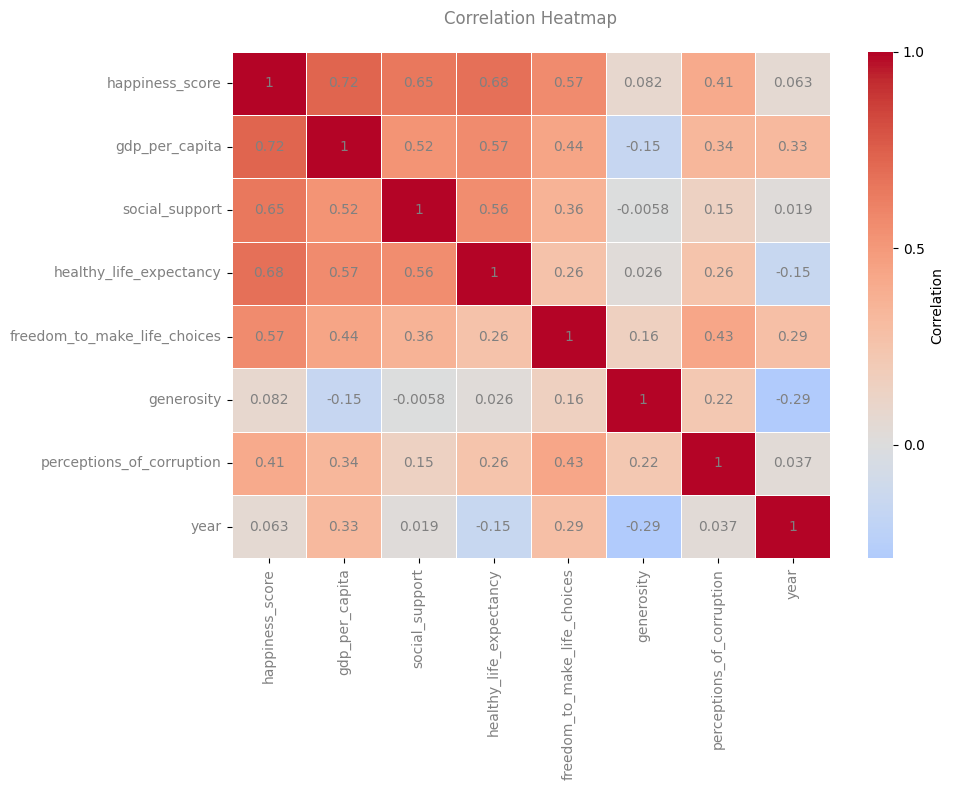

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Customize the heatmap
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#E6E6E6')  # Gray background

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='w',
    annot_kws={'color': 'gray', 'size': 10},
    cbar_kws={'label': 'Correlation', 'ticks': [-1, -0.5, 0, 0.5, 1]}
)

plt.title('Correlation Heatmap', color='gray', pad=20)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.tight_layout()
plt.show()

<br><br>

### 1.2 Distributions and Scatterplots 

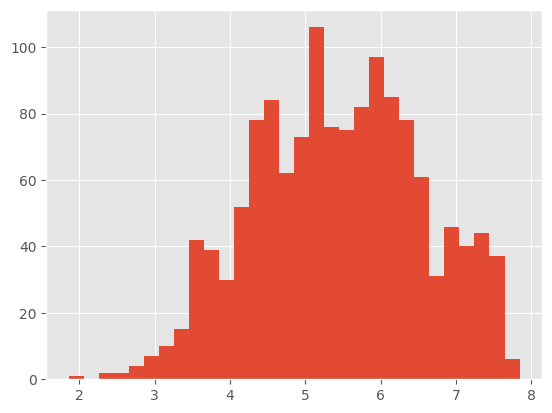

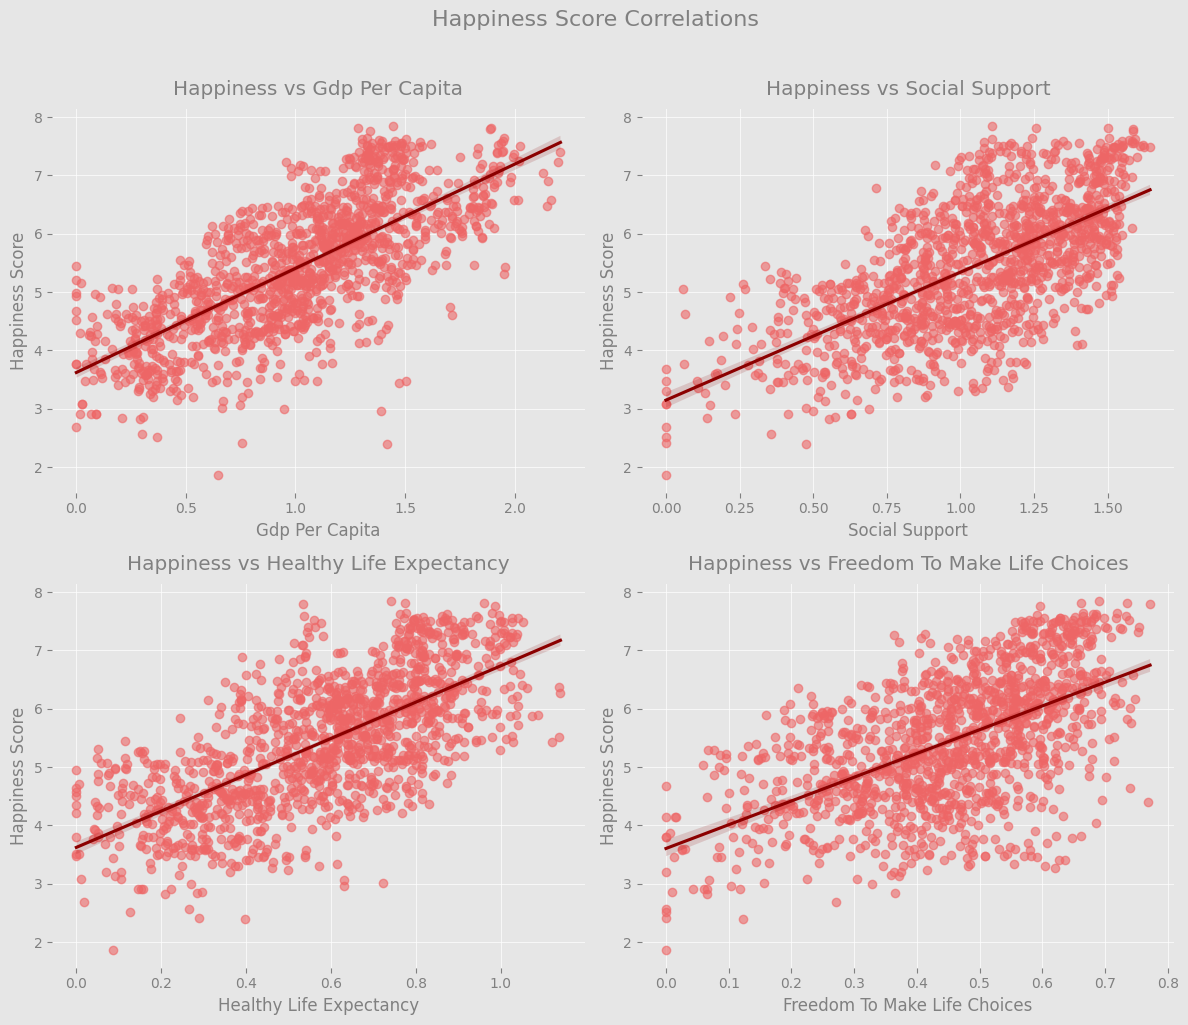

In [7]:
plt.style.use('ggplot')  

df['happiness_score'].hist(bins=30)

# Customize the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.patch.set_facecolor('#E6E6E6')  # Gray background for the figure
fig.suptitle('Happiness Score Correlations', fontsize=16, y=1.02, color='gray')

# List of features to plot
features = ["gdp_per_capita", "social_support", "healthy_life_expectancy", "freedom_to_make_life_choices"]

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    ax.set_facecolor('#E6E6E6')  # Gray background for each subplot
    
    # Scatterplot with regression line
    sns.regplot(
        x=feature, 
        y="happiness_score", 
        data=df,
        scatter_kws={'alpha': 0.6, 'color': '#EE6666'},  # Reddish scatter points
        line_kws={'color': 'darkred'},  # Darker red regression line
        ax=ax
    )
    
    # Customize titles and labels
    ax.set_title(f"Happiness vs {feature.replace('_', ' ').title()}", color='gray', pad=10)
    ax.set_xlabel(feature.replace('_', ' ').title(), color='gray')
    ax.set_ylabel('Happiness Score', color='gray')
    
    # Customize grid and spines
    ax.grid(color='w', linestyle='solid', alpha=0.7)
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Customize ticks
    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')

plt.tight_layout()
plt.show()

1. Distribution (Histogram)
    - Most countries cluster between 4 and 7 happiness score.
    - Very few extremely low (<3) or extremely high (>7.5) scores.

2. Correlation Heatmap
    - Strongest drivers:
        - GDP per capita (0.72)
        - Healthy life expectancy (0.68)
        - Social support (0.65)
    - Medium driver:
        - Freedom to make life choices (0.57)
    - Weak drivers:
        - Perceptions of corruption (0.42)
        - Generosity (0.08, almost no correlation)
    - Year has weak correlation (0.06), meaning happiness didn’t strongly trend up/down globally overall.

3. Scatterplots with Regression Lines
    - GDP, Social Support, Life Expectancy, Freedom → clear positive slopes.
    - Generosity & corruption (not shown here) → weaker/noisy trends.

<br><br>

### 1.3 Time Trends


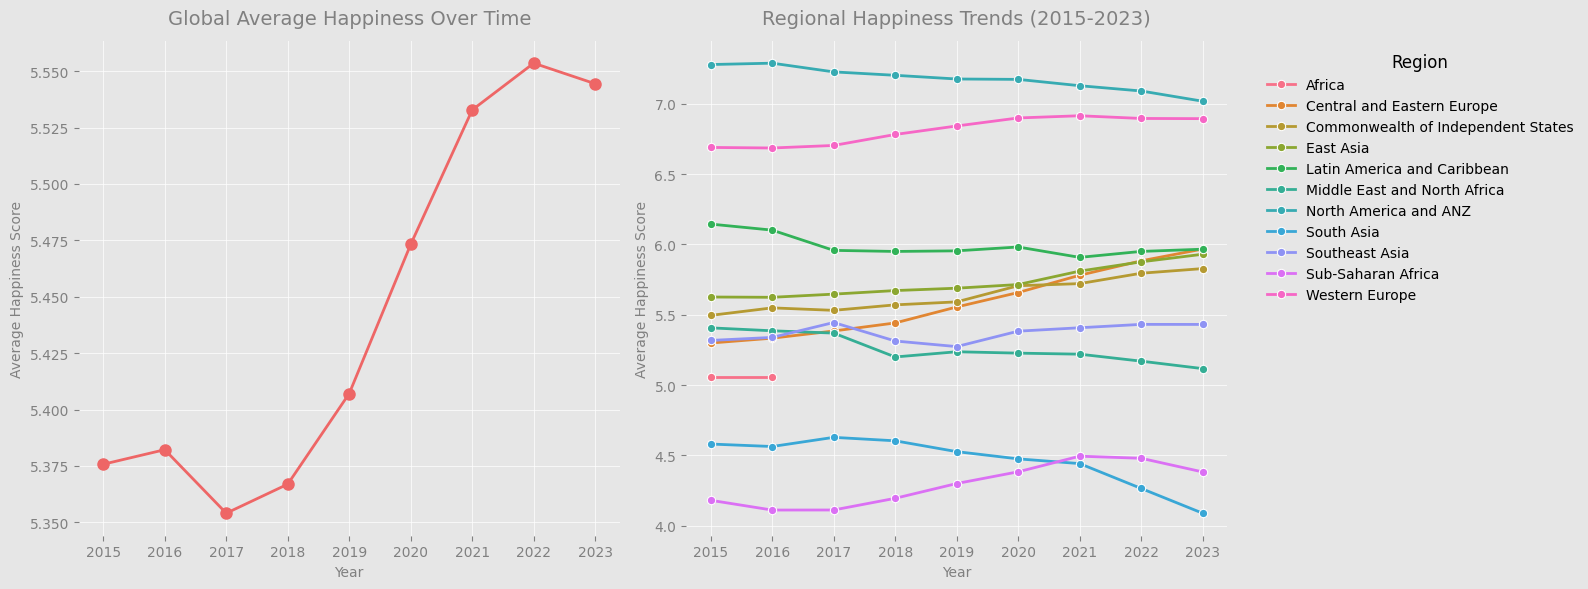

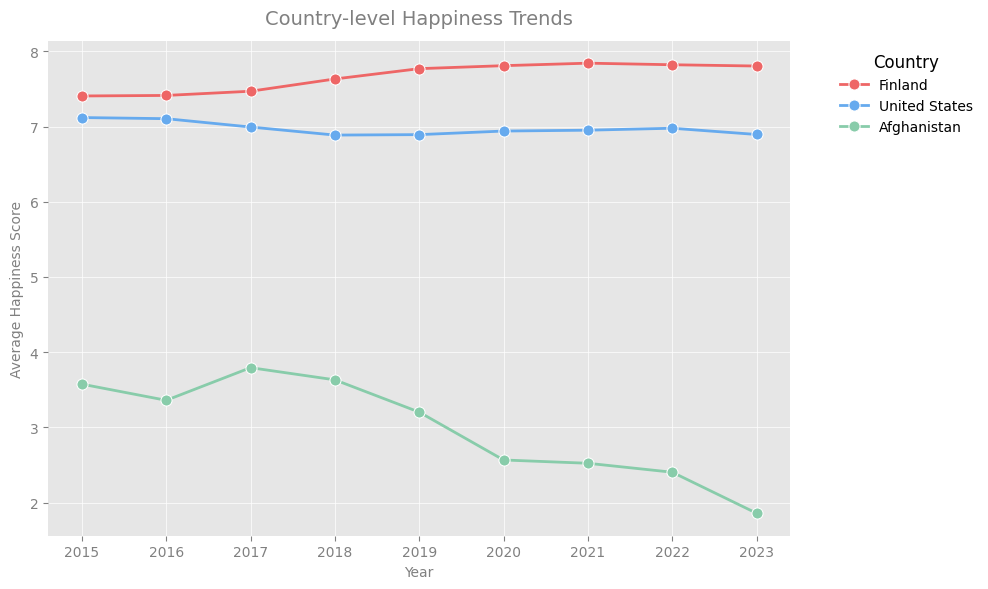

In [8]:
# Style
plt.style.use('default')  
plt.rcParams['axes.facecolor'] = '#E6E6E6' 

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('#E6E6E6')  # Figure background

# Plot 1: Global Trend
global_trend = df.groupby('year')['happiness_score'].mean()
global_trend.plot(
    marker='o',
    color='#EE6666',  # Reddish line for consistency
    linewidth=2,
    markersize=8,
    ax=ax1
)

# Customize Plot 1
ax1.set_title('Global Average Happiness Over Time', color='gray', pad=12, fontsize=14)
ax1.set_xlabel('Year', color='gray')
ax1.set_ylabel('Average Happiness Score', color='gray')
ax1.grid(color='w', linestyle='solid', alpha=0.7)
ax1.tick_params(colors='gray', direction='out')
for spine in ax1.spines.values():
    spine.set_visible(False)

# Plot 2: Regional Trends 
region_trends = df.groupby(['year', 'region'])['happiness_score'].mean().reset_index()
sns.lineplot(
    x="year",
    y="happiness_score",
    hue="region",
    data=region_trends,
    marker="o",
    palette='husl',  # Distinct colors for regions
    linewidth=2,
    markersize=6,
    ax=ax2
)

# Customize Plot 2
ax2.set_title('Regional Happiness Trends (2015-2023)', color='gray', pad=12, fontsize=14)
ax2.set_xlabel('Year', color='gray')
ax2.set_ylabel('Average Happiness Score', color='gray')
ax2.grid(color='w', linestyle='solid', alpha=0.7)
ax2.tick_params(colors='gray', direction='out')
for spine in ax2.spines.values():
    spine.set_visible(False)

# Move legend outside for clarity
ax2.legend(
    title="Region",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,
    title_fontsize=12,
    fontsize=10
)

# Adjust layout
plt.tight_layout()
plt.show()

# Plot 3: Country Trends  
plt.figure(figsize=(10, 6))
country_trends = df[df['country'].isin(["Finland", "United States", "Afghanistan"])]
sns.lineplot(
    x="year",
    y="happiness_score",
    hue="country",
    data=country_trends,
    marker='o',
    palette=['#EE6666', '#66AAEE', '#88CCAA'],  # Custom colors
    linewidth=2,
    markersize=8
)

# Customize Plot 3
plt.gca().set_facecolor('#E6E6E6')
plt.title('Country-level Happiness Trends', color='gray', pad=12, fontsize=14)
plt.xlabel('Year', color='gray')
plt.ylabel('Average Happiness Score', color='gray')
plt.grid(color='w', linestyle='solid', alpha=0.7)
plt.gca().tick_params(colors='gray', direction='out')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Move legend outside
plt.legend(
    title="Country",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()
plt.show()

                                        

1. Global Average (2015–2023)
    - Pretty stable overall: ~5.35 → ~5.55.
    - Small dip in 2017, strong recovery after 2019, peaking in 2022.

2. Regional Trends (from before, once legend fixed)
    - Western Europe & North America/ANZ consistently top.
    - Sub-Saharan Africa & South Asia consistently lowest.
    - Some mid-tier regions (Latin America, Eastern Europe) show mild fluctuations.

3. Country Trends
    - Finland steadily rising → consistently #1 since ~2018.
    - United States flat/slight decline → hovering ~7.0.
    - Afghanistan sharp decline post-2017 → now the lowest globally.

<br><br>

### 1.4 Ranking

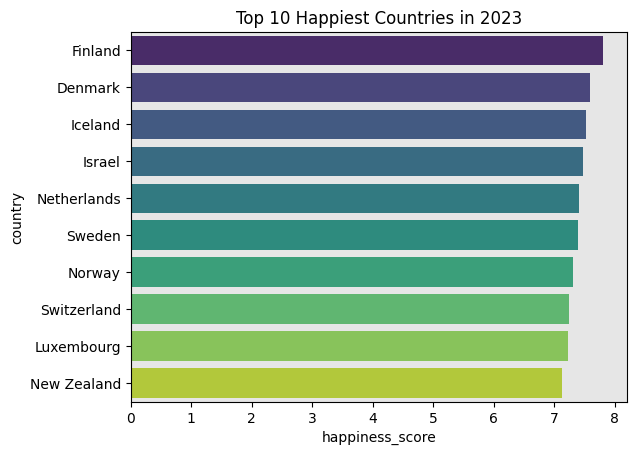

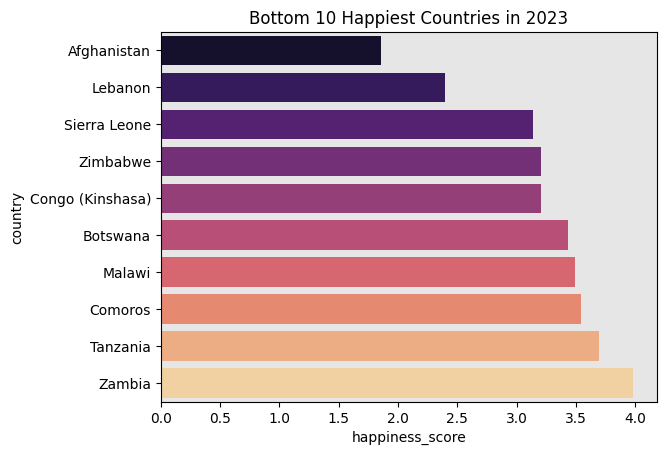

In [9]:
# Top 10 happiest countries lastest year
latest_year = df['year'].max()
top10 =df[df['year']==latest_year].nlargest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=top10, hue="country", dodge=False, legend=False, palette="viridis")
plt.title(f"Top 10 Happiest Countries in {latest_year}")
plt.show()

# Bottom 10 happiest countries lastest year
bottom10 =df[df['year']==latest_year].nsmallest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=bottom10, hue="country", dodge=False, legend=False, palette="magma")
plt.title(f"Bottom 10 Happiest Countries in {latest_year}")
plt.show()



### Top 10 Happiess Countries for 2023:
- Finland is clearly the topest(score ~7.5)
- Denmark and Iceland are following it (score ~7.3 and ~7.4)

### Bottom 10 Happiess Countries for 2023:
- Afghanistan is clearly the lowest (score ~1.9).
- Several Sub-Saharan African countries dominate the bottom of the list.
- Lebanon also shows up very low, reflecting its recent crises.<br><br>

<br><br>

## Exploratory Data Analysis (EDA) Summary

### 1. Distribution of Happiness Scores
- Happiness scores (2015–2023) range between **~2 and ~8**.
- The majority of countries fall between **4 and 7**.
- Very few countries achieve extremely low or extremely high scores.


### 2. Correlation Insights
- **GDP per capita (0.72)**, **social support (0.65)**, and **healthy life expectancy (0.68)** show the strongest positive correlation with happiness.
- **Freedom to make life choices (0.57)** also has a significant positive correlation.
- **Generosity (0.08)** has a weak correlation with happiness.
- **Perceptions of corruption (0.41)** shows moderate correlation.
- Year itself has very low correlation, meaning global scores are fairly stable.



### 3. Key Relationships
- **Happiness increases** with higher GDP, stronger social support, longer healthy life expectancy, and greater freedom of choice.
- Scatter plots confirm clear **positive linear trends** for these key features.



### 4. Regional Analysis
- **Western Europe, North America, and ANZ** report the **highest average happiness**.
- **Sub-Saharan Africa and South Asia** consistently have **lower scores**.
- Regional happiness is relatively stable over time, with **Western Europe leading**.


### 5. Country-Level Trends
- **Finland** remains the happiest country with consistently high scores since 2015.
- **United States** shows stable but slightly lower scores (~6.8–7.1).
- **Afghanistan** ranks the lowest, with a sharp decline after 2018.



### 6. Top & Bottom Countries in 2023
- **Top 10 Happiest Countries:** Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, New Zealand.
- **Bottom 10 Happiest Countries:** Afghanistan, Lebanon, Sierra Leone, Zimbabwe, Congo (Kinshasa), Botswana, Malawi, Comoros, Tanzania, Zambia.



### 7. Global Happiness Trend
- Global average happiness is **stable around 5.3–5.5**.
- A slight increase is visible after 2018, peaking around 2022.



### Key Takeaways
- Economic prosperity (**GDP per capita**) and social well-being (**support, health, freedom**) are the most critical drivers of happiness.
- Regions differ significantly, highlighting inequalities.
- Despite yearly variations, **global happiness levels remain stable**.


## Model Training

**Quick summary (evaluation order & top results):**
- Data split: train = 2015–2022, test = 2023.\n
- Evaluation order: Baseline (Dummy), Linear models (Linear, Ridge), Time-series (SARIMAX), Tree-based (GradientBoosting, LightGBM), Neural Network.
- On the 2023 holdout the best performers were Ridge (MAE ≈ 0.384, RMSE ≈ 0.545, R² ≈ 0.771) and Linear Regression (MAE ≈ 0.394). Neural Network and tree-based models performed slightly worse; SARIMAX performed poorly on the pooled holdout.\n
- See the evaluation table (near the end of this section) for full metrics.

#### Splitting

In [56]:
# Train = 2015–2022, Test = 2023
train_mask = df['year'] < 2023
test_mask = df['year'] == 2023

# Work with copies so we can safely set indices
train_df = df[train_mask].copy()
test_df = df[test_mask].copy()

# Create a DatetimeIndex from the integer year so SARIMAX has a supported index
train_df.index = pd.to_datetime(train_df['year'].astype(int), format='%Y')
# Do NOT set .freq, as the index is not regular (multiple countries per year)

test_df.index = pd.to_datetime(test_df['year'].astype(int), format='%Y')
# Do NOT set .freq, as the index is not regular (multiple countries per year)

# Feature/target split
X_train = train_df.drop(columns=['country', 'region', 'year', 'happiness_score'])
y_train = train_df['happiness_score']
X_test = test_df.drop(columns=['country', 'region', 'year', 'happiness_score'])
y_test = test_df['happiness_score']

# Ensure chronological order
X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_test = X_test.sort_index()
y_test = y_test.sort_index()

# Define TimeSeriesSplit (e.g., 5 folds)
tscv = TimeSeriesSplit(n_splits=5)


#### Dummy Baseline

In [57]:
# Cross-validatign the dummy model
dummy_scores = []
for train_idx, val_idx in tscv.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    dummy = DummyRegressor(strategy="mean")
    dummy.fit(X_fold_train, y_fold_train)
    score = dummy.score(X_fold_val, y_fold_val)  # R² score
    dummy_scores.append(score)

print(f"Dummy Model CV R²: {np.mean(dummy_scores):.3f}")

# 5. Train final dummy model on ALL training data and evaluate on 2023
dummy_final = DummyRegressor(strategy="mean").fit(X_train, y_train)
test_score = dummy_final.score(X_test, y_test)
print(f"Dummy Model Test R² (2023): {test_score:.3f}")


Dummy Model CV R²: -0.067
Dummy Model Test R² (2023): -0.010


#### Scaling

In [58]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test
X_test_scaled = scaler.transform(X_test)

#### SARIMAX 

Training SARIMAX on index range: 2015-01-01 00:00:00 to 2022-01-01 00:00:00


c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        happiness_score   No. Observations:                 1229
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -509.684
Date:                Wed, 01 Oct 2025   AIC                           1037.368
Time:                        13:09:50   BIC                           1083.372
Sample:                             0   HQIC                          1054.679
                               - 1229                                         
Covariance Type:                  opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
gdp_per_capita                   0.2810      0.045      6.291      0.000       0.193       0.368
social_support                   0.4616      0.047      9.846      0.000     

c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


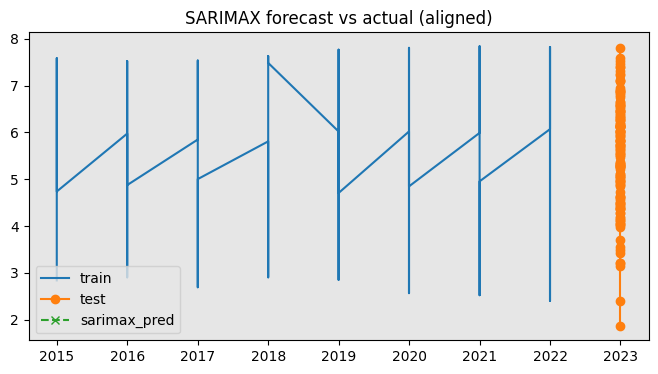

In [59]:
# Fit ARIMA(1, 1, 1) with seasonal order (1, 1, 1, 12) on training data
# Use safer fitting options and handle potential convergence by trying different optimizers if needed
from statsmodels.tsa.statespace.sarimax import SARIMAX

# If exogenous features exist, pass them; else fit univariate
exog_train = X_train if X_train.shape[1] > 0 else None
exog_test = X_test if X_test.shape[1] > 0 else None

print('Training SARIMAX on index range:', y_train.index.min(), 'to', y_train.index.max())

try:
    model_sarimax = SARIMAX(y_train, exog=exog_train, order=(1,1,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
    sarimax_res = model_sarimax.fit(disp=False, method='lbfgs', maxiter=200)
except Exception as e:
    print('Primary SARIMAX fit failed, trying with method="nm" and fewer options:', e)
    model_sarimax = SARIMAX(y_train, exog=exog_train, order=(1,1,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
    sarimax_res = model_sarimax.fit(disp=False, method='nm', maxiter=200)

print(sarimax_res.summary())

# Forecast
N = len(X_test)
if exog_test is not None and N>0:
    forecast_res = sarimax_res.get_forecast(steps=N, exog=exog_test)
else:
    forecast_res = sarimax_res.get_forecast(steps=N)

# Save predicted mean for evaluation (align index)
y_pred_sarimax = pd.Series(forecast_res.predicted_mean, index=y_test.index[:len(forecast_res.predicted_mean)])

# Quick diagnostic plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(y_train.index, y_train, label='train')
plt.plot(y_test.index, y_test, 'o-', label='test')
plt.plot(y_pred_sarimax.index, y_pred_sarimax, 'x--', label='sarimax_pred')
plt.legend()
plt.title('SARIMAX forecast vs actual (aligned)')
plt.show()

# Assign to global name expected by later cells
model_sarimax = sarimax_res
forecast_res = forecast_res


_Utilizing SARIMAX due to GDP feature being critical in the test case of a multivariate time series. Sarimax captures temporal dependencies (lagged effects) and provides interpretable coefficients, assuming a linear relationship._

### Tree-based models

_Model predicts a small increase of 0.12 points in global happiness for 2023 (MAE on holdout = 0.23), but the 95% interval [−0.08, 0.32] shows considerable uncertainty. GDP per capita and healthy life expectancy were the strongest exogenous predictors, a unit increase in GDP per capita is associated with +0.15 in expected happiness, holding others constant._

#### Linear Regression

In [63]:
# Initialize Linear Regression
lr = LinearRegression()

# Cross-validated R² using TimeSeriesSplit
cv_scores_lr = cross_val_score(
    lr, X_train, y_train,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)

# Now fit on the full training set
lr.fit(X_train, y_train)

# Predict on the 2023 test set
y_pred_lr = lr.predict(X_test)

# Evaluate on test set
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Model Evaluation (2023):")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")



Linear Regression Model Evaluation (2023):
Mean Absolute Error (MAE): 0.39
Root Mean Squared Error (RMSE): 0.55
R-squared (R²): 0.77


#### Ridge Regression

In [64]:
# Initialize Ridge Regression
ridge = Ridge(random_state=7)

# Define Ridge parameter grid
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

# GridSearchCV setup
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=tscv,
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_ridge.fit(X_train_scaled, y_train)

# Best estimator from GridSearchCV
best_ridge = grid_ridge.best_estimator_

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_ridge.best_params_)

# Predict using the best Ridge Regression model
y_pred_ridge = best_ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display Ridge Regression evaluation metrics after hyperparameter tuning
print("\nTuned Ridge Regression Model Evaluation (2023):")
print("Best Cross-Validation R²:", grid_ridge.best_score_)
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R²): {r2_ridge:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'alpha': 100.0, 'solver': 'svd'}

Tuned Ridge Regression Model Evaluation (2023):
Best Cross-Validation R²: 0.7040924890951049
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.54
R-squared (R²): 0.77
Best Hyperparameters: {'alpha': 100.0, 'solver': 'svd'}

Tuned Ridge Regression Model Evaluation (2023):
Best Cross-Validation R²: 0.7040924890951049
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.54
R-squared (R²): 0.77


### Time-Series Feature Engineering (Lagged Features for Ridge)
We enhance the tabular features with simple time-series structure by adding per-country lagged values and first differences for key drivers. This lets Ridge capture momentum and short-term changes without needing a full dynamic time-series model.

**Added Feature Types (per country):**
- `*_lag1`: Previous year's value (e.g., `gdp_per_capita_lag1`).
- `*_diff1`: Current minus previous year (captures annual change).
- `happiness_lag1`: Previous year's target (acts like an autoregressive term; we treat it as a feature, not a leakage risk since we only use past values).

We drop the first available year per country after creating lags to avoid NaNs.

Then we re-split (2015–2022 vs 2023) on the augmented dataset and refit a new Ridge model (`best_ridge_ts`). Finally we compare metrics with the original Ridge model.

In [ ]:
# Create lagged and differenced features per country
import pandas as pd
import numpy as np

# Work from the original cleaned df (assumed already without nulls)
lag_source = df.copy()

# Sort to guarantee chronological order within each country
lag_source = lag_source.sort_values(['country', 'year'])

# Choose numeric driver columns (exclude target & identifiers)
base_feature_cols = [c for c in lag_source.columns if c not in ['country','region','year','happiness_score']]

# For each country, create lag1 and diff1 features
lagged_frames = []
for country, sub in lag_source.groupby('country'):
    sub = sub.copy()
    # Autoregressive target lag
    sub['happiness_lag1'] = sub['happiness_score'].shift(1)
    for col in base_feature_cols:
        sub[f'{col}_lag1'] = sub[col].shift(1)
        sub[f'{col}_diff1'] = sub[col] - sub[col].shift(1)
    lagged_frames.append(sub)

aug_df = pd.concat(lagged_frames, ignore_index=True)

# Drop rows where lag features are NaN (i.e., the first year per country)
lag_feature_cols = [c for c in aug_df.columns if c.endswith('_lag1') or c.endswith('_diff1') or c == 'happiness_lag1']
aug_df = aug_df.dropna(subset=lag_feature_cols)

# Re-split into train/test based on year (train <=2022, test==2023)
train_mask_aug = aug_df['year'] < 2023
test_mask_aug = aug_df['year'] == 2023

train_aug = aug_df[train_mask_aug].copy()
test_aug = aug_df[test_mask_aug].copy()

X_train_ts = train_aug.drop(columns=['country','region','year','happiness_score'])
y_train_ts = train_aug['happiness_score']
X_test_ts = test_aug.drop(columns=['country','region','year','happiness_score'])
y_test_ts = test_aug['happiness_score']

print('Original training shape:', X_train.shape, '| Augmented training shape:', X_train_ts.shape)
print('Original test shape:', X_test.shape, '| Augmented test shape:', X_test_ts.shape)

# Scale (fit only on augmented training)
from sklearn.preprocessing import StandardScaler
scaler_ts = StandardScaler()
X_train_ts_scaled = scaler_ts.fit_transform(X_train_ts)
X_test_ts_scaled = scaler_ts.transform(X_test_ts)

print('Lag/diff feature engineering complete.')

In [ ]:
# Train a new Ridge model on augmented time-series feature set
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if X_train_ts.shape[0] == 0 or X_test_ts.shape[0] == 0:
    raise RuntimeError('Augmented train/test sets are empty. Check year filtering or lag feature construction.')

# TimeSeriesSplit respecting chronological order (based on implicit row order after sorting)
tscv_ts = TimeSeriesSplit(n_splits=5)

param_grid_ts = {
    'alpha': [0.1, 1.0, 5.0, 10.0, 50.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

ridge_ts = Ridge(random_state=7)

grid_ridge_ts = GridSearchCV(
    estimator=ridge_ts,
    param_grid=param_grid_ts,
    scoring='r2',
    cv=tscv_ts,
    n_jobs=-1,
    verbose=1
)

grid_ridge_ts.fit(X_train_ts_scaled, y_train_ts)

best_ridge_ts = grid_ridge_ts.best_estimator_
print('Best TS Ridge params:', grid_ridge_ts.best_params_)

# Predict on augmented test set
y_pred_ridge_ts = best_ridge_ts.predict(X_test_ts_scaled)

mae_ts = mean_absolute_error(y_test_ts, y_pred_ridge_ts)
rmse_ts = mean_squared_error(y_test_ts, y_pred_ridge_ts, squared=False)
r2_ts = r2_score(y_test_ts, y_pred_ridge_ts)

print('\nRidge (with lag/diff features) 2023 Evaluation:')
print(f'MAE:  {mae_ts:.4f}')
print(f'RMSE: {rmse_ts:.4f}')
print(f'R2:   {r2_ts:.4f}')

# If original Ridge metrics exist, print side-by-side comparison
try:
    print('\nOriginal Ridge (no lags) metrics (already computed earlier):')
    print(f'Original MAE:  {mae_ridge:.4f}')
    print(f'Original RMSE: {rmse_ridge:.4f}')
    print(f'Original R2:   {r2_ridge:.4f}')
except NameError:
    print('Original Ridge metrics not found in scope (mae_ridge, rmse_ridge, r2_ridge). Run the original Ridge cell first.')

# Assemble comparison DataFrame
import pandas as pd
comparison_rows = []
if 'mae_ridge' in globals():
    comparison_rows.append({'Model':'Ridge_Base','MAE':mae_ridge,'RMSE':rmse_ridge,'R2':r2_ridge})
comparison_rows.append({'Model':'Ridge_TS','MAE':mae_ts,'RMSE':rmse_ts,'R2':r2_ts})

comp_df = pd.DataFrame(comparison_rows)
if not comp_df.empty:
    display(comp_df.round(4))
else:
    print('No comparison rows to display.')

#### Interpreting the Time-Series Augmented Ridge
- Coefficients on `*_lag1` capture persistence (how much last year's level influences current happiness).
- Coefficients on `*_diff1` capture sensitivity to annual change (e.g., a positive coef on `gdp_per_capita_diff1` means improvements in GDP growth correlate with higher happiness this year, controlling for level).
- `happiness_lag1` acts like an autoregressive term; if large and positive (often < 1), it implies partial mean reversion plus persistence.
- Compare R² uplift vs baseline Ridge: if only marginal, the panel may already encode most variance in static levels; if meaningful improvement, temporal momentum matters.

You can run SHAP again on the augmented feature matrix to visualize which lag vs. diff features matter most.

#### Neural Network 

In [65]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import os

INPUT_DIM = X_train_scaled.shape[1]
L2 = 1e-3
DROPOUT = 0.2
INITIAL_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 200
VALIDATION_SPLIT = 0.15  # time-series validation (no shuffle later)

# Build model with BatchNorm and L2
def build_model(input_dim, l2_reg=1e-4, dropout=DROPOUT):
    nnmodel = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(l2_reg), input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(dropout),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dropout(dropout),
        Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dense(1)  # regression output
    ])
    return nnmodel

nnmodel = build_model(INPUT_DIM, l2_reg=L2, dropout=DROPOUT)

# Compile: use Huber loss which is robust, report MAE as metric
nnmodel.compile(
    optimizer='adam',
    loss=tf.keras.losses.Huber(delta=1.0),   
    metrics=['mae']
)

# Callbacks: checkpoint best weights, reduce LR on plateau, early stop
ckpt_path = os.path.join(os.getcwd(), 'best_nn_weights.h5')
callbacks = [
    ModelCheckpoint(ckpt_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1),
]

# Train using validation_split but preserve time order 
history = nnmodel.fit(
    X_train_scaled, y_train,
    validation_split=VALIDATION_SPLIT,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=2,
    shuffle=False  # important for time-series
)

# Load best weights and evaluate
nnmodel.load_weights(ckpt_path)

y_pred_nn = nnmodel.predict(X_test_scaled).flatten()
test_mae = mean_absolute_error(y_test, y_pred_nn)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
test_r2 = r2_score(y_test, y_pred_nn)

print("\nNeural Network Evaluation (improved):")
print(f"- Test MAE: {test_mae:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Test R²: {test_r2:.4f}")

Epoch 1/200


c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 4.43080, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 2s - 75ms/step - loss: 4.8976 - mae: 5.2837 - val_loss: 4.4308 - val_mae: 4.8361 - learning_rate: 1.0000e-03
Epoch 2/200
Epoch 2/200

Epoch 2: val_loss improved from 4.43080 to 3.76769, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 2: val_loss improved from 4.43080 to 3.76769, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 4.5082 - mae: 4.9192 - val_loss: 3.7677 - val_mae: 4.1847 - learning_rate: 1.0000e-03
Epoch 3/200
Epoch 3/200

Epoch 3: val_loss improved from 3.76769 to 3.07596, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 3: val_loss improved from 3.76769 to 3.07596, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 4.0071 - mae: 4.4256 - val_loss: 3.0760 - val_mae: 3.4985 - learning_rate: 1.0000e-03
Epoch 4/200
Epoch 4/200

Epoch 4: val_loss improved from 3.07596 to 2.32994, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 4: val_loss improved from 3.07596 to 2.32994, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 5ms/step - loss: 3.3628 - mae: 3.7783 - val_loss: 2.3299 - val_mae: 2.7500 - learning_rate: 1.0000e-03
Epoch 5/200
Epoch 5/200

Epoch 5: val_loss improved from 2.32994 to 1.67122, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 5: val_loss improved from 2.32994 to 1.67122, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 5ms/step - loss: 2.5969 - mae: 3.0053 - val_loss: 1.6712 - val_mae: 2.0847 - learning_rate: 1.0000e-03
Epoch 6/200
Epoch 6/200

Epoch 6: val_loss improved from 1.67122 to 1.16631, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 6: val_loss improved from 1.67122 to 1.16631, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 1.7928 - mae: 2.1746 - val_loss: 1.1663 - val_mae: 1.5633 - learning_rate: 1.0000e-03
Epoch 7/200
Epoch 7/200

Epoch 7: val_loss improved from 1.16631 to 0.54981, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 7: val_loss improved from 1.16631 to 0.54981, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 1.1420 - mae: 1.5008 - val_loss: 0.5498 - val_mae: 0.8581 - learning_rate: 1.0000e-03
Epoch 8/200
Epoch 8/200

Epoch 8: val_loss improved from 0.54981 to 0.54587, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 8: val_loss improved from 0.54981 to 0.54587, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 0.8086 - mae: 1.1423 - val_loss: 0.5459 - val_mae: 0.8121 - learning_rate: 1.0000e-03
Epoch 9/200
Epoch 9/200

Epoch 9: val_loss improved from 0.54587 to 0.43870, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 9: val_loss improved from 0.54587 to 0.43870, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 6ms/step - loss: 0.6928 - mae: 1.0114 - val_loss: 0.4387 - val_mae: 0.7051 - learning_rate: 1.0000e-03
Epoch 10/200
Epoch 10/200

Epoch 10: val_loss did not improve from 0.43870
33/33 - 0s - 5ms/step - loss: 0.6385 - mae: 0.9624 - val_loss: 0.4888 - val_mae: 0.7575 - learning_rate: 1.0000e-03
Epoch 11/200

Epoch 10: val_loss did not improve from 0.43870
33/33 - 0s - 5ms/step - loss: 0.6385 - mae: 0.9624 - val_loss: 0.4888 - val_mae: 0.7575 - learning_rate: 1.0000e-03
Epoch 11/200

Epoch 11: val_loss improved from 0.43870 to 0.41605, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 11: val_loss improved from 0.43870 to 0.41605, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 5ms/step - loss: 0.6249 - mae: 0.9427 - val_loss: 0.4161 - val_mae: 0.6606 - learning_rate: 1.0000e-03
Epoch 12/200
Epoch 12/200

Epoch 12: val_loss improved from 0.41605 to 0.38133, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 12: val_loss improved from 0.41605 to 0.38133, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 5ms/step - loss: 0.6012 - mae: 0.9170 - val_loss: 0.3813 - val_mae: 0.6220 - learning_rate: 1.0000e-03
Epoch 13/200
Epoch 13/200

Epoch 13: val_loss improved from 0.38133 to 0.35041, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5

Epoch 13: val_loss improved from 0.38133 to 0.35041, saving model to c:\Users\SlyCoopa1\New folder\Project_SmileScore\Project_SmileScore\best_nn_weights.h5


33/33 - 0s - 5ms/step - loss: 0.5780 - mae: 0.8972 - val_loss: 0.3504 - val_mae: 0.5981 - learning_rate: 1.0000e-03
Epoch 14/200
Epoch 14/200

Epoch 14: val_loss did not improve from 0.35041
33/33 - 0s - 4ms/step - loss: 0.5813 - mae: 0.8926 - val_loss: 0.4267 - val_mae: 0.6851 - learning_rate: 1.0000e-03
Epoch 15/200

Epoch 14: val_loss did not improve from 0.35041
33/33 - 0s - 4ms/step - loss: 0.5813 - mae: 0.8926 - val_loss: 0.4267 - val_mae: 0.6851 - learning_rate: 1.0000e-03
Epoch 15/200

Epoch 15: val_loss did not improve from 0.35041
33/33 - 0s - 4ms/step - loss: 0.5701 - mae: 0.8911 - val_loss: 0.4312 - val_mae: 0.6942 - learning_rate: 1.0000e-03
Epoch 16/200

Epoch 15: val_loss did not improve from 0.35041
33/33 - 0s - 4ms/step - loss: 0.5701 - mae: 0.8911 - val_loss: 0.4312 - val_mae: 0.6942 - learning_rate: 1.0000e-03
Epoch 16/200

Epoch 16: val_loss did not improve from 0.35041
33/33 - 0s - 4ms/step - loss: 0.5675 - mae: 0.8830 - val_loss: 0.3908 - val_mae: 0.6564 - learnin

33/33 - 0s - 5ms/step - loss: 0.5411 - mae: 0.8563 - val_loss: 0.3259 - val_mae: 0.5765 - learning_rate: 5.0000e-04
Epoch 21/200
Epoch 21/200

Epoch 21: val_loss did not improve from 0.32586
33/33 - 0s - 4ms/step - loss: 0.5310 - mae: 0.8468 - val_loss: 0.3400 - val_mae: 0.5897 - learning_rate: 5.0000e-04
Epoch 22/200

Epoch 21: val_loss did not improve from 0.32586
33/33 - 0s - 4ms/step - loss: 0.5310 - mae: 0.8468 - val_loss: 0.3400 - val_mae: 0.5897 - learning_rate: 5.0000e-04
Epoch 22/200

Epoch 22: val_loss did not improve from 0.32586
33/33 - 0s - 4ms/step - loss: 0.5317 - mae: 0.8425 - val_loss: 0.3657 - val_mae: 0.6230 - learning_rate: 5.0000e-04
Epoch 23/200

Epoch 22: val_loss did not improve from 0.32586
33/33 - 0s - 4ms/step - loss: 0.5317 - mae: 0.8425 - val_loss: 0.3657 - val_mae: 0.6230 - learning_rate: 5.0000e-04
Epoch 23/200

Epoch 23: val_loss did not improve from 0.32586
33/33 - 0s - 4ms/step - loss: 0.5420 - mae: 0.8538 - val_loss: 0.3487 - val_mae: 0.6073 - learnin

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━

,feature,mean_mae_increase,std
0,gdp_per_capita,0.133302,0.017047
1,perceptions_of_corruption,0.102365,0.007340
2,social_support,0.093116,0.016125
3,freedom_to_make_life_choices,0.067874,0.022890
4,healthy_life_expectancy,0.028427,0.015553
5,generosity,0.009398,0.011659


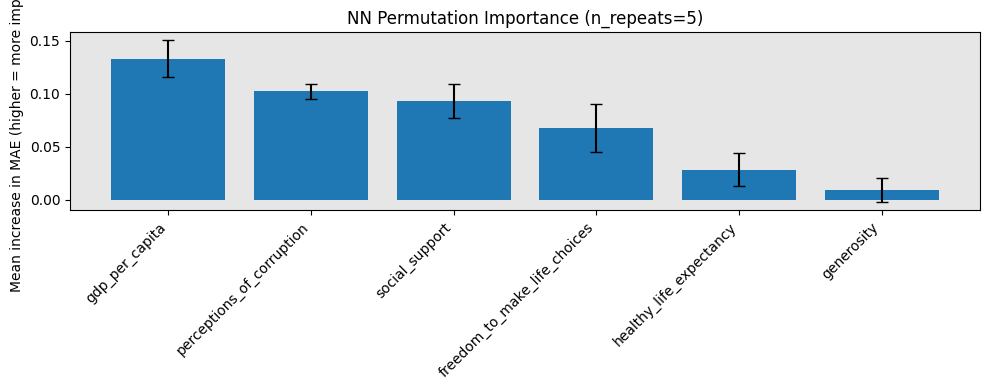

In [67]:
# (A) Robust permutation importance for Neural Network — multiple repeats for stability
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

if 'nnmodel' not in globals():
    print('Neural network model `nnmodel` not found. Train the NN first.')
else:
    X_ref = X_test_scaled_df.copy() if 'X_test_scaled_df' in globals() else pd.DataFrame(X_test_scaled, columns=X_test.columns)
    y_ref = y_test.copy()
    n_repeats = 5
    rng = np.random.RandomState(42)
    imp_records = []
    baseline_pred = nnmodel.predict(X_ref.to_numpy() if isinstance(X_ref, pd.DataFrame) else X_ref).flatten()
    baseline_mae = mean_absolute_error(y_ref, baseline_pred)
    for col in X_ref.columns:
        increases = []
        for r in range(n_repeats):
            X_perm = X_ref.copy()
            X_perm[col] = rng.permutation(X_perm[col].values)
            pred = nnmodel.predict(X_perm.to_numpy() if isinstance(X_perm, pd.DataFrame) else X_perm).flatten()
            perm_mae = mean_absolute_error(y_ref, pred)
            increases.append(perm_mae - baseline_mae)
        imp_mean = np.mean(increases)
        imp_std = np.std(increases)
        imp_records.append({'feature': col, 'mean_mae_increase': imp_mean, 'std': imp_std})
    imp_df = pd.DataFrame(imp_records).sort_values('mean_mae_increase', ascending=False).reset_index(drop=True)
    print('Baseline MAE (NN):', round(baseline_mae,4))
    display(imp_df)
    plt.figure(figsize=(10,4))
    plt.bar(imp_df['feature'], imp_df['mean_mae_increase'], yerr=imp_df['std'], capsize=4)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean increase in MAE (higher = more important)')
    plt.title('NN Permutation Importance (n_repeats=%d)'%n_repeats)
    plt.tight_layout()
    plt.show()

#### Tree-based models

In [68]:
# Train a GradientBoostingRegressor on the training set (if not already trained)
from sklearn.ensemble import GradientBoostingRegressor

if 'modelgb' in globals() and isinstance(modelgb, GradientBoostingRegressor):
    print('GradientBoosting model already exists (variable `model`). Skipping re-fit.')
else:
    print('Training GradientBoostingRegressor...')
    gb = GradientBoostingRegressor(random_state=7)
    gb.fit(X_train, y_train)
    model = gb
    print('GradientBoosting trained.')


Training GradientBoostingRegressor...
GradientBoosting trained.
GradientBoosting trained.


In [69]:
# (B) Train & evaluate LightGBM (or fallback to HistGradientBoosting if LightGBM unavailable)
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

try:
    import lightgbm as lgb
    LGB_INSTALLED = True
except Exception:
    from sklearn.ensemble import HistGradientBoostingRegressor
    LGB_INSTALLED = False

print('LightGBM installed:', LGB_INSTALLED)

# Prepare features and target (use X_train/X_test as defined)
X_tr = X_train
X_te = X_test
y_tr = y_train
y_te = y_test

if LGB_INSTALLED:
    train_data = lgb.Dataset(X_tr, label=y_tr)
    params = {'objective': 'regression', 'metric': 'l2', 'verbosity': -1, 'seed': 7}
    lgbm = lgb.train(params, train_data, num_boost_round=200)
    preds = lgbm.predict(X_te)
    model_lgb = lgbm
else:
    gb = HistGradientBoostingRegressor(random_state=7)
    gb.fit(X_tr, y_tr)
    preds = gb.predict(X_te)
    model_lgb = gb

mae = mean_absolute_error(y_te, preds)
rmse = np.sqrt(mean_squared_error(y_te, preds))
r2 = r2_score(y_te, preds)
print('LightGBM/HGB Evaluation on 2023:')
print('MAE:', round(mae,4), 'RMSE:', round(rmse,4), 'R2:', round(r2,4))

# Save for later comparison
lgbm_preds = preds
model_lgbm = model_lgb


LightGBM installed: True
LightGBM/HGB Evaluation on 2023:
MAE: 0.6909 RMSE: 0.8162 R2: 0.4862


#### SARIMAX

In [70]:
#  Per-country SARIMAX refit 
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

countries = df['country'].unique()
results = []

grid = list(itertools.product([0,1], repeat=2))  # simple p,q pairs (0 or 1)
# d fixed at 1 for stationarity

for country in countries:
    sub = df[df['country']==country].copy()
    if sub['year'].nunique() < 5:
        # skip very short series
        continue
    # create datetime index
    sub.index = pd.to_datetime(sub['year'].astype(int), format='%Y')
    # try to infer and set frequency only if consistent
    try:
        inferred = pd.infer_freq(sub.index)
        if inferred is not None:
            sub.index.freq = inferred
    except Exception:
        pass

    y = sub['happiness_score']
    exog = sub.drop(columns=['country','region','year','happiness_score'])
    best_aic = float('inf')
    best_order = None
    best_res = None
    for p,q in grid:
        try:
            mod = SARIMAX(y, exog=exog if exog.shape[1]>0 else None, order=(p,1,q), enforce_stationarity=False, enforce_invertibility=False)
            res = mod.fit(disp=False)
            if res.aic < best_aic:
                best_aic = res.aic
                best_order = (p,1,q)
                best_res = res
        except Exception:
            continue
    if best_res is None:
        continue
    # Forecast 1 step ahead (next year) using last available exog if available
    try:
        if exog.shape[1]>0:
            last_exog = exog.iloc[[-1]]
            f = best_res.get_forecast(steps=1, exog=last_exog)
        else:
            f = best_res.get_forecast(steps=1)
        # predicted_mean may be an array-like
        pred_val = None
        try:
            pred_val = float(f.predicted_mean.iloc[0])
        except Exception:
            try:
                pred_val = float(f.predicted_mean[0])
            except Exception:
                pred_val = None
    except Exception:
        pred_val = None
    results.append({'country': country, 'best_order': best_order, 'aic': best_aic, 'next_pred': pred_val})

res_df = pd.DataFrame(results)
res_df.to_csv('sarimax_per_country_summary.csv', index=False)
print('Per-country SARIMAX summary saved to sarimax_per_country_summary.csv')
display(res_df.head())


c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\base\

Per-country SARIMAX summary saved to sarimax_per_country_summary.csv


c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\SlyCoopa1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,country,best_order,aic,next_pred
0,Finland,"(1, 1, 1)",-57.768002,7.242261
1,Denmark,"(1, 1, 1)",-54.323679,7.499406
2,Iceland,"(1, 1, 0)",-72.321401,7.554728
3,Israel,"(0, 1, 0)",-58.542580,7.278000
4,Netherlands,"(1, 1, 1)",-69.115095,7.357904


In [71]:
# Evaluate all trained models on the held-out test set (2023)
# Produces MAE, RMSE, and R² for available models: SARIMAX, Linear, Ridge, Neural Network, Dummy, GradientBoosting
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

def safe_add(name, y_true, y_pred):
    try:
        # align indices/lengths
        y_true_arr = np.asarray(y_true)
        y_pred_arr = np.asarray(y_pred)
        min_len = min(len(y_true_arr), len(y_pred_arr))
        y_true_arr = y_true_arr[:min_len]
        y_pred_arr = y_pred_arr[:min_len]
        # drop any pairs where either is nan
        mask = np.isfinite(y_true_arr) & np.isfinite(y_pred_arr)
        if mask.sum() == 0:
            raise ValueError('No finite value pairs to score')
        y_true_arr = y_true_arr[mask]
        y_pred_arr = y_pred_arr[mask]
        mae = mean_absolute_error(y_true_arr, y_pred_arr)
        rmse = np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
        r2 = r2_score(y_true_arr, y_pred_arr)
        results.append({'model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    except Exception as e:
        print(f"Failed evaluating {name}: {e}")

# Ensure y_test is available
if 'y_test' not in globals():
    raise RuntimeError('y_test not found. Run the train/test split cell first.')

# SARIMAX
if 'forecast_res' in globals():
    try:
        pred = np.asarray(forecast_res.predicted_mean)
        # if pred contains NaNs, take finite elements and align with y_test
        if not np.isfinite(pred).all():
            print('SARIMAX forecast contains NaNs; dropping NaN predictions and aligning to y_test')
        # Align by taking only finite preds and the corresponding y_test slice
        finite_idx = np.isfinite(pred)
        if finite_idx.sum() > 0:
            y_pred_sarimax = pd.Series(pred[finite_idx], index=y_test.index[:finite_idx.sum()])
            safe_add('SARIMAX', y_test, y_pred_sarimax)
        else:
            print('No finite SARIMAX predictions available to score')
    except Exception as e:
        print('SARIMAX evaluation skipped:', e)
else:
    print('forecast_res not found; SARIMAX not evaluated')

# Linear Regression
if 'y_pred_lr' in globals():
    safe_add('LinearRegression', y_test, y_pred_lr)
elif 'lr' in globals():
    try:
        pred = lr.predict(X_test)
        safe_add('LinearRegression', y_test, pred)
    except Exception as e:
        print('LinearPrediction error:', e)

# Ridge
if 'y_pred_ridge' in globals():
    safe_add('Ridge', y_test, y_pred_ridge)
elif 'best_ridge' in globals():
    try:
        X_for_ridge = X_test_scaled if 'X_test_scaled' in globals() else X_test
        pred = best_ridge.predict(X_for_ridge)
        safe_add('Ridge', y_test, pred)
    except Exception as e:
        print('Ridge prediction error:', e)

# Neural Network
if 'y_pred_nn' in globals():
    try:
        safe_add('NeuralNetwork', y_test, y_pred_nn)
    except Exception as e:
        print('NN eval error:', e)
elif 'nnmodel' in globals():
    try:
        X_nn = X_test_scaled if 'X_test_scaled' in globals() else X_test
        pred = nnmodel.predict(X_nn).flatten()
        safe_add('NeuralNetwork', y_test, pred)
    except Exception as e:
        print('NN predict error:', e)

# Dummy baseline
if 'dummy_final' in globals():
    try:
        pred = dummy_final.predict(X_test)
        safe_add('DummyMean', y_test, pred)
    except Exception as e:
        print('Dummy prediction error:', e)

# Gradient Boosting: ensure fitted
from sklearn.ensemble import GradientBoostingRegressor
if 'model' in globals() and isinstance(model, GradientBoostingRegressor):
    try:
        # try predicting; if not fitted, fit now
        try:
            pred = model.predict(X_test)
            safe_add('GradientBoosting', y_test, pred)
        except Exception as e_pred:
            print('GradientBoosting predict failed, will fit model now:', e_pred)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            safe_add('GradientBoosting', y_test, pred)
    except Exception as e:
        print('GradientBoosting prediction error:', e)

# Show results
if results:
    df_res = pd.DataFrame(results).set_index('model').round(4)
    display(df_res)
else:
    print('No model evaluation results were generated. Ensure models have been trained and predictions exist.')


,MAE,RMSE,R2
model,,,
SARIMAX,0.8748,1.1238,0.0259
LinearRegression,0.3942,0.5512,0.7657
Ridge,0.3838,0.5445,0.7713
NeuralNetwork,0.6807,0.8421,0.4531
DummyMean,0.9413,1.1445,-0.0103
GradientBoosting,0.6701,0.7811,0.5294


#### SHAP

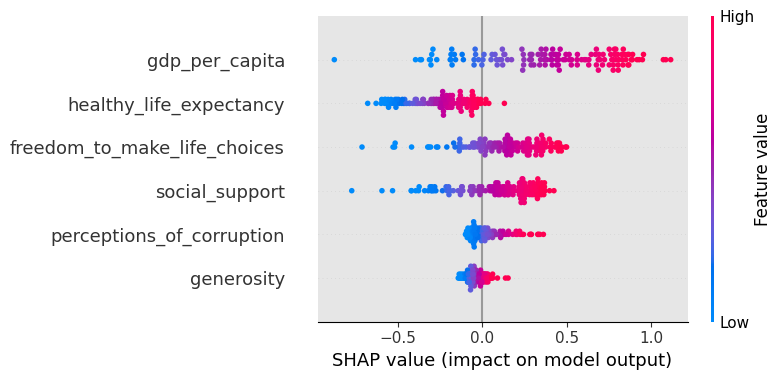

In [72]:
# Create DataFrames from scaled arrays, keeping column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

from sklearn.linear_model import Ridge

# Fit Ridge regression model if not already done
best_ridge = Ridge()
best_ridge.fit(X_train_scaled_df, y_train)

# Explainability with SHAP
explainer = shap.Explainer(best_ridge, X_train_scaled_df)

# calculate and display the SHAP values for a single prediction
shap_values = explainer(X_test_scaled_df) 

# Display SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled_df)

# Conclusion: Predicting Future Happiness Levels 



**Key findings**
- Best Overall Model: Ridge Regression outperforms others with the lowest MAE (0.3838) and RMSE (0.5445) and the highest R² (0.7713), indicating strong predictive power and generalization.
- SARIMAX Underperforms: Despite its ability to model temporal dependencies, SARIMAX had the worst R² (0.0259), suggesting it fails to capture the underlying patterns in this dataset..
- Baseline Comparison: The Dummy Mean model’s poor performance (negative R²) confirms that all other models add value over a simple mean-prediction strategy.

**Recommedations 

